<a href="https://colab.research.google.com/github/Finweto/cas_etude_1/blob/main/Test_models_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Librairies

In [1]:
import tensorflow as tf

import matplotlib.pyplot as plt
from IPython.display import clear_output
import cv2
import random
import math
from google.colab import drive


# Récuperation des models et des photos test

In [2]:
# !unzip 'saved_model.zip' -d '/content'
drive.mount('/content/drive')

Mounted at /content/drive


# Chargement model et photos tests

## Chargement model

In [3]:
# Loading of the saved Model
generator_photoToMonet = tf.keras.models.load_model('/content/drive/Shareddrives/Modeles_etude_cas/saved_model/generator_photoToMonet')
generator_photoToMonet.compile()

## Chargement des photos

In [18]:
PHOTO_FILENAMES = tf.io.gfile.glob('/content/drive/Shareddrives/Modeles_etude_cas/photo_jpg/*.jpg')
print(len(PHOTO_FILENAMES))
PHOTO_FILENAMES = random.sample(PHOTO_FILENAMES,7043)

7043


# Pipeline Pré-Processing

In [19]:
BUFFER_SIZE = 1000
BATCH_SIZE = 1
IMG_WIDTH = 256
IMG_HEIGHT = 256

In [20]:
def make_dataset(url_list):
  dataset = []
  for url in url_list:
    dataset.append(cv2.cvtColor(cv2.imread(url),cv2.COLOR_BGR2RGB))

  return dataset

# normalizing the images to [-1, 1]
def normalize(image):
  image = tf.cast(image, tf.float32)
  image = (image / 127.5) - 1
  return image

def resize_image(image,image_height=IMG_HEIGHT,image_width=IMG_WIDTH):
  image = tf.image.resize(image,[image_height,image_width])
  return image

def preprocess_image_test(image):
  image = resize_image(image,IMG_HEIGHT,IMG_WIDTH)
  image = normalize(image)
  return image


In [21]:
dataset_photo = make_dataset(PHOTO_FILENAMES)

# we only take the photos not used for the training of our model to test
photo_test = dataset_photo[math.floor(len(dataset_photo)*0.7):]

for i in range(len(photo_test)):
  photo_test[i] = preprocess_image_test(photo_test[i])

photo_test = tf.data.Dataset.from_tensor_slices(photo_test).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

# Test du Générateur


## Photo test
Vous pouvez relancer cette cellule pour générer d'autres peintures

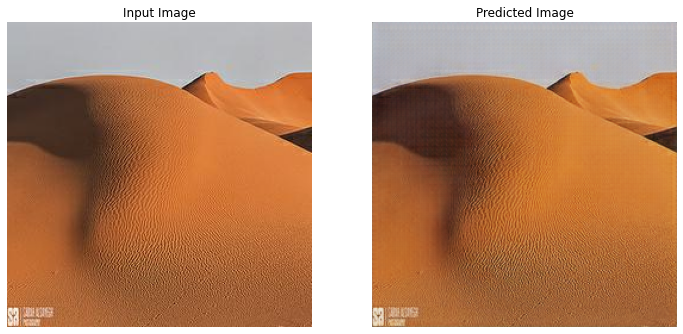

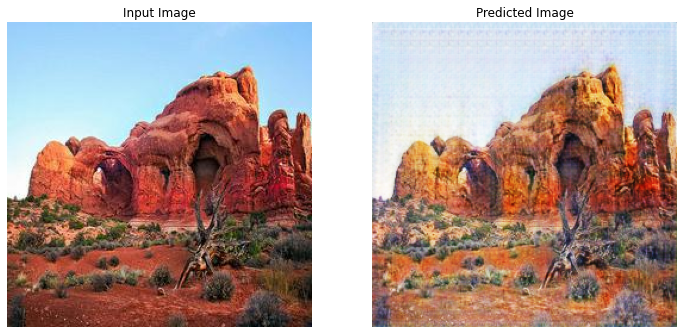

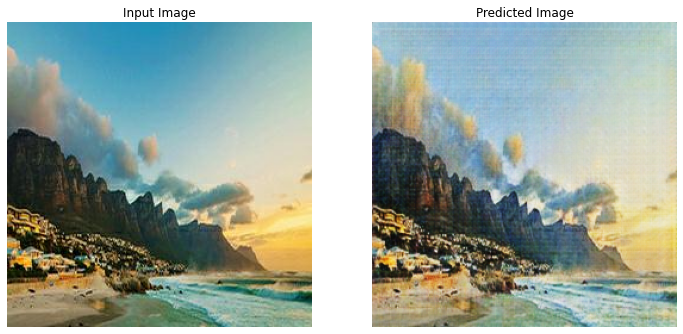

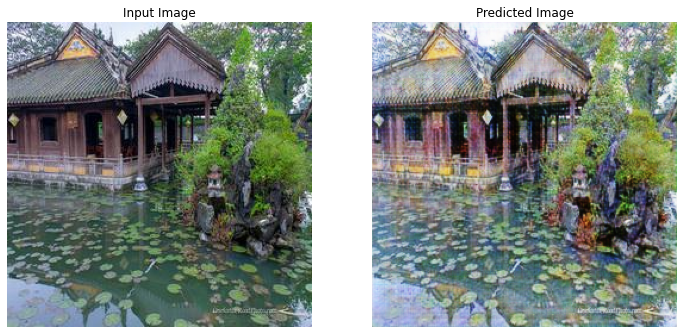

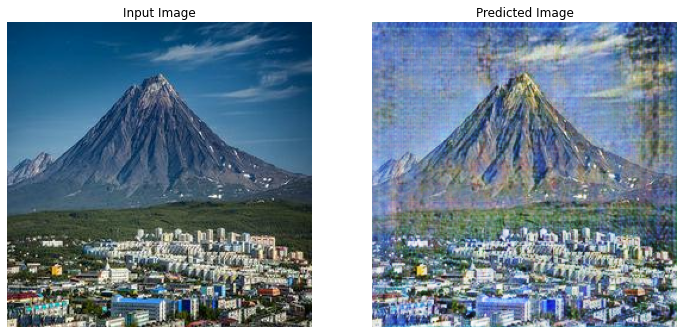

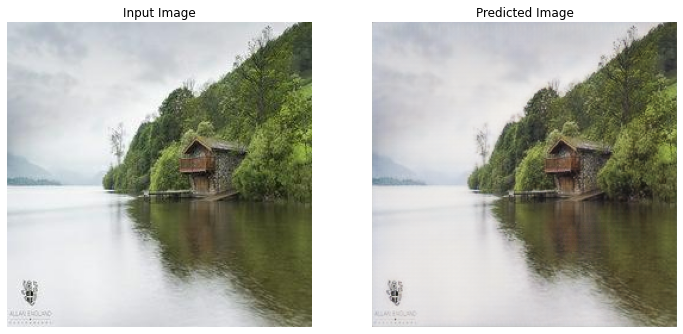

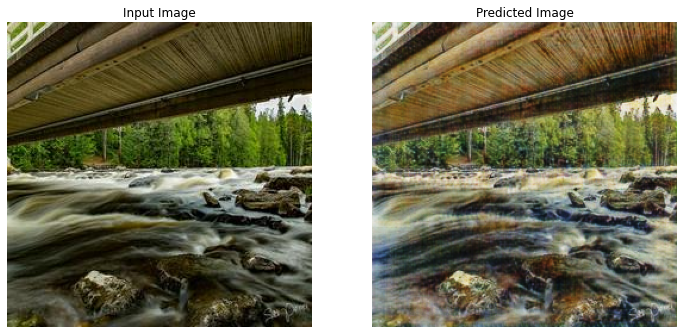

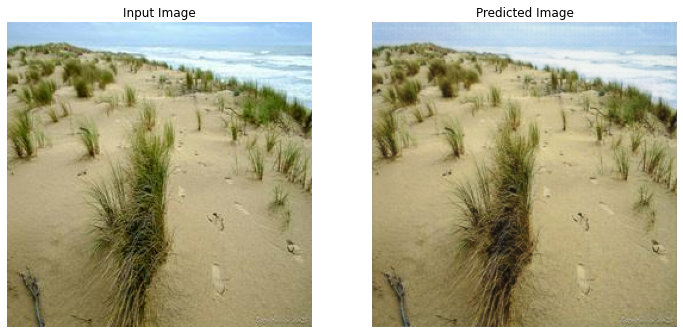

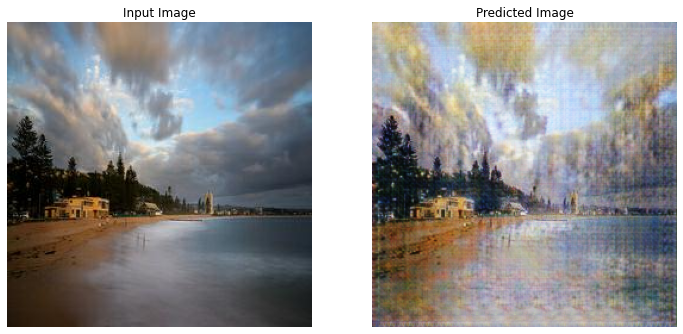

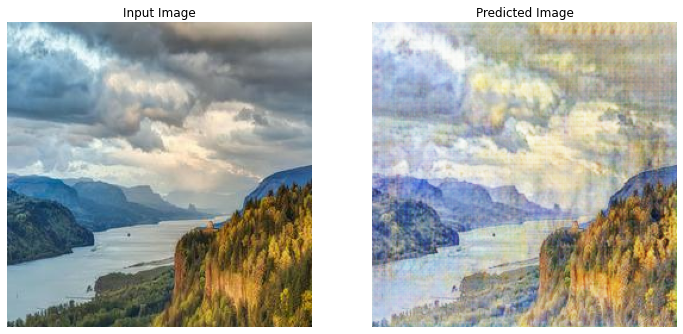

In [26]:
# Function to display generated images
def generate_images(model, test_input):
  prediction = model(test_input)
    
  plt.figure(figsize=(12, 12))

  display_list = [test_input[0], prediction[0]]
  title = ['Input Image', 'Predicted Image']

  for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.title(title[i])
    # getting the pixel values between [0, 1] to plot it.
    plt.imshow(display_list[i] * 0.5 + 0.5)
    plt.axis('off')
  plt.show()

NBR_PHOTOS = 10

# We display generated images
for inp in photo_test.take(NBR_PHOTOS):
  generate_images(generator_photoToMonet, inp)